# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 0.1: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [5]:
# load in the data
azdias = pd.read_csv('data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/Users/Archana/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

In [6]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [7]:
azdias.shape

(891221, 366)

In [8]:
azdias.isnull().sum()/len(azdias)

LNR                     0.000000
AGER_TYP                0.000000
AKT_DAT_KL              0.082470
ALTER_HH                0.082470
ALTER_KIND1             0.909048
                          ...   
WOHNDAUER_2008          0.082470
WOHNLAGE                0.104517
ZABEOTYP                0.000000
ANREDE_KZ               0.000000
ALTERSKATEGORIE_GROB    0.000000
Length: 366, dtype: float64

In [9]:
azdias_na_proportions = azdias.isnull().sum()/len(azdias)

In [10]:
azdias_na_proportions[azdias_na_proportions > 0.5]

ALTER_KIND1     0.909048
ALTER_KIND2     0.966900
ALTER_KIND3     0.993077
ALTER_KIND4     0.998648
EXTSEL992       0.733996
KK_KUNDENTYP    0.655967
dtype: float64

In [11]:
azdias.dtypes.value_counts()

float64    267
int64       93
object       6
dtype: int64

In [12]:
azdias_cat_cols = [col for col in azdias.columns if azdias[col].dtype==object]
azdias_cat_cols

['CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'D19_LETZTER_KAUF_BRANCHE',
 'EINGEFUEGT_AM',
 'OST_WEST_KZ']

In [13]:
azdias[azdias_cat_cols].head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,NaN,NaN,NaN,NaN,NaN,NaN
1,8A,8,51,NaN,1992-02-10 00:00:00,W
2,4C,4,24,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2,12,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,6,43,D19_SCHUHE,1992-02-12 00:00:00,W


In [14]:
print(azdias["CAMEO_DEU_2015"].nunique())
azdias["CAMEO_DEU_2015"].value_counts()

45


6B    56672
8A    52438
4C    47819
2D    35074
3C    34769
7A    34399
3D    34307
8B    33434
4A    33155
8C    30993
9D    28593
9B    27676
9C    24987
7B    24503
9A    20542
2C    19422
8D    17576
6E    16107
2B    15486
5D    14943
6C    14820
2A    13249
5A    12214
1D    11909
1A    10850
3A    10543
5B    10354
5C     9935
7C     9065
4B     9047
4D     8570
3B     7160
6A     6810
9E     6379
6D     6073
6F     5392
7D     5333
4E     5321
1E     5065
7E     4633
1C     4317
5F     4283
1B     4071
5E     3581
XX      373
Name: CAMEO_DEU_2015, dtype: int64

In [15]:
print(azdias["CAMEO_DEUG_2015"].nunique())
azdias["CAMEO_DEUG_2015"].value_counts()

19


8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [16]:
print(azdias["CAMEO_INTL_2015"].nunique())
azdias["CAMEO_INTL_2015"].value_counts()

43


51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
XX        373
Name: CAMEO_INTL_2015, dtype: int64

In [17]:
print(azdias["D19_LETZTER_KAUF_BRANCHE"].nunique())
azdias["D19_LETZTER_KAUF_BRANCHE"].value_counts()

35


D19_UNBEKANNT             195338
D19_VERSICHERUNGEN         57734
D19_SONSTIGE               44722
D19_VOLLSORTIMENT          34812
D19_SCHUHE                 32578
D19_BUCH_CD                28754
D19_VERSAND_REST           26034
D19_DROGERIEARTIKEL        24072
D19_BANKEN_DIREKT          23273
D19_BEKLEIDUNG_REST        21796
D19_HAUS_DEKO              20858
D19_TELKO_MOBILE           14447
D19_ENERGIE                12084
D19_TELKO_REST             11472
D19_BANKEN_GROSS           10550
D19_BEKLEIDUNG_GEH         10272
D19_KINDERARTIKEL           7301
D19_FREIZEIT                7257
D19_TECHNIK                 7002
D19_LEBENSMITTEL            6458
D19_BANKEN_REST             5247
D19_RATGEBER                4931
D19_NAHRUNGSERGAENZUNG      4061
D19_DIGIT_SERV              3577
D19_REISEN                  3122
D19_TIERARTIKEL             2578
D19_SAMMELARTIKEL           2443
D19_HANDWERK                2227
D19_WEIN_FEINKOST           2164
D19_GARTEN                  1646
D19_BANKEN

In [18]:
print(azdias["OST_WEST_KZ"].nunique())
azdias["OST_WEST_KZ"].value_counts()

2


W    629528
O    168545
Name: OST_WEST_KZ, dtype: int64

In [19]:
azdias_cat_cols

['CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'D19_LETZTER_KAUF_BRANCHE',
 'EINGEFUEGT_AM',
 'OST_WEST_KZ']

In [20]:
azdias["EINGEFUEGT_AM"].head()

0                    NaN
1    1992-02-10 00:00:00
2    1992-02-12 00:00:00
3    1997-04-21 00:00:00
4    1992-02-12 00:00:00
Name: EINGEFUEGT_AM, dtype: object

In [21]:
azdias["EINGEFUEGT_AM"].isnull().sum()

93148

In [22]:
azdias.shape

(891221, 366)

In [23]:
azdias_cols = azdias.columns
customers_cols = customers.columns
set(customers_cols)-set(azdias_cols)

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [24]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [25]:
customers.shape

(191652, 369)

In [26]:
customers.isnull().sum()/len(customers)

LNR                     0.000000
AGER_TYP                0.000000
AKT_DAT_KL              0.243128
ALTER_HH                0.243128
ALTER_KIND1             0.938607
                          ...   
PRODUCT_GROUP           0.000000
CUSTOMER_GROUP          0.000000
ONLINE_PURCHASE         0.000000
ANREDE_KZ               0.000000
ALTERSKATEGORIE_GROB    0.000000
Length: 369, dtype: float64

In [27]:
customers_na_proportions = customers.isnull().sum()/len(customers)
customers_na_proportions[customers_na_proportions > 0.5]

ALTER_KIND1     0.938607
ALTER_KIND2     0.973389
ALTER_KIND3     0.993347
ALTER_KIND4     0.998769
KK_KUNDENTYP    0.584064
dtype: float64

In [28]:
customers_na_proportions["EXTSEL992"]

0.44498883392816146

In [29]:
customers.dtypes.value_counts()

float64    267
int64       94
object       8
dtype: int64

In [30]:
customers_cat_cols = [col for col in customers.columns if customers[col].dtype==object]
customers_cat_cols

['CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'D19_LETZTER_KAUF_BRANCHE',
 'EINGEFUEGT_AM',
 'OST_WEST_KZ',
 'PRODUCT_GROUP',
 'CUSTOMER_GROUP']

In [31]:
customers[customers_cat_cols].head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
0,1A,1,13,D19_UNBEKANNT,1992-02-12 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
1,NaN,NaN,NaN,D19_BANKEN_GROSS,NaN,NaN,FOOD,SINGLE_BUYER
2,5D,5,34,D19_UNBEKANNT,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER
3,4C,4,24,D19_NAHRUNGSERGAENZUNG,1992-02-10 00:00:00,W,COSMETIC,MULTI_BUYER
4,7B,7,41,D19_SCHUHE,1992-02-12 00:00:00,W,FOOD,MULTI_BUYER


In [32]:
print(customers["CAMEO_DEU_2015"].nunique())
customers["CAMEO_DEU_2015"].value_counts()

45


2D    11208
6B     9634
4C     9053
3D     8085
4A     7507
3C     6628
1D     5880
2C     5076
5D     4546
8A     4252
1A     4198
7A     4109
8B     3790
2A     3715
2B     3485
7B     3421
1E     3337
6E     3086
6C     2832
8C     2801
8D     2206
1C     2206
4D     2124
4B     2093
5A     1969
9D     1957
3A     1904
3B     1773
5B     1696
5C     1574
9E     1508
4E     1287
6D     1235
7C     1194
6F     1168
1B     1157
5F     1059
7E     1034
9A     1023
9C      987
9B      917
5E      822
7D      800
6A      762
XX      126
Name: CAMEO_DEU_2015, dtype: int64

In [33]:
print(customers["CAMEO_DEUG_2015"].nunique())
customers["CAMEO_DEUG_2015"].value_counts()

19


2      17574
4      16458
6      14008
3      13585
1      12498
8       9716
5       8624
7       7878
2.0     5910
4.0     5606
3.0     4805
9       4731
6.0     4709
1.0     4280
8.0     3333
5.0     3042
7.0     2680
9.0     1661
X        126
Name: CAMEO_DEUG_2015, dtype: int64

In [34]:
print(customers["CAMEO_INTL_2015"].nunique())
customers["CAMEO_INTL_2015"].value_counts()

43


14      14708
24      13301
41       8461
43       7158
25       6900
15       6845
51       5987
13       5728
22       5566
14.0     4939
24.0     4504
23       4276
34       3945
45       3936
54       3537
41.0     2859
55       2794
12       2791
43.0     2476
25.0     2472
15.0     2372
44       2144
51.0     2126
31       2050
13.0     1955
22.0     1941
35       1741
23.0     1494
34.0     1423
45.0     1352
54.0     1258
32       1256
33       1178
12.0      924
55.0      920
52        770
44.0      688
31.0      681
35.0      553
32.0      440
33.0      396
52.0      253
XX        126
Name: CAMEO_INTL_2015, dtype: int64

In [35]:
print(customers["D19_LETZTER_KAUF_BRANCHE"].nunique())
customers["D19_LETZTER_KAUF_BRANCHE"].value_counts()

35


D19_UNBEKANNT             31910
D19_SONSTIGE              14540
D19_VERSICHERUNGEN        10534
D19_BUCH_CD               10038
D19_VOLLSORTIMENT          8647
D19_HAUS_DEKO              8129
D19_SCHUHE                 6317
D19_BEKLEIDUNG_GEH         5975
D19_DROGERIEARTIKEL        5528
D19_ENERGIE                4454
D19_BEKLEIDUNG_REST        4096
D19_VERSAND_REST           3619
D19_BANKEN_DIREKT          3466
D19_LEBENSMITTEL           3053
D19_TELKO_REST             2303
D19_NAHRUNGSERGAENZUNG     2253
D19_TELKO_MOBILE           2131
D19_TECHNIK                1836
D19_BANKEN_GROSS           1684
D19_FREIZEIT               1672
D19_SAMMELARTIKEL          1610
D19_RATGEBER               1519
D19_KINDERARTIKEL          1439
D19_WEIN_FEINKOST          1424
D19_BANKEN_REST            1233
D19_BIO_OEKO                808
D19_REISEN                  666
D19_DIGIT_SERV              653
D19_GARTEN                  568
D19_HANDWERK                532
D19_BILDUNG                 357
D19_TIER

In [36]:
customers_cat_cols

['CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'D19_LETZTER_KAUF_BRANCHE',
 'EINGEFUEGT_AM',
 'OST_WEST_KZ',
 'PRODUCT_GROUP',
 'CUSTOMER_GROUP']

In [37]:
print(customers["OST_WEST_KZ"].nunique())
customers["OST_WEST_KZ"].value_counts()

2


W    130382
O     11343
Name: OST_WEST_KZ, dtype: int64

In [38]:
customers["EINGEFUEGT_AM"].isnull().sum()

49927

In [39]:
customers.shape

(191652, 369)

In [40]:
customer_only_cols = ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']
customers[customer_only_cols].head()

,CUSTOMER_GROUP,ONLINE_PURCHASE,PRODUCT_GROUP
0,MULTI_BUYER,0,COSMETIC_AND_FOOD
1,SINGLE_BUYER,0,FOOD
2,MULTI_BUYER,0,COSMETIC_AND_FOOD
3,MULTI_BUYER,0,COSMETIC
4,MULTI_BUYER,0,FOOD


In [41]:
print(customers["CUSTOMER_GROUP"].nunique())
customers["CUSTOMER_GROUP"].value_counts()

2


MULTI_BUYER     132238
SINGLE_BUYER     59414
Name: CUSTOMER_GROUP, dtype: int64

In [42]:
print(customers["PRODUCT_GROUP"].nunique())
customers["PRODUCT_GROUP"].value_counts()

3


COSMETIC_AND_FOOD    100860
FOOD                  47382
COSMETIC              43410
Name: PRODUCT_GROUP, dtype: int64

In [43]:
print(customers["ONLINE_PURCHASE"].nunique())
customers["ONLINE_PURCHASE"].value_counts()

2


0    174356
1     17296
Name: ONLINE_PURCHASE, dtype: int64

<AxesSubplot:xlabel='PRODUCT_GROUP', ylabel='count'>

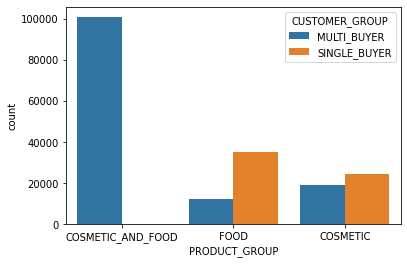

In [44]:
import seaborn as sns
sns.countplot(x="PRODUCT_GROUP", hue="CUSTOMER_GROUP", data=customers)

In [45]:
cols_to_drop = ['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'KK_KUNDENTYP', 'EXTSEL992']
print(cols_to_drop)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'KK_KUNDENTYP', 'EXTSEL992']


In [46]:
print(customer_only_cols)

['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']


In [47]:
pop_cols = [col for col in azdias.columns if col not in cols_to_drop]
cust_cols = [col for col in customers.columns if col not in cols_to_drop+customer_only_cols]
print(len(pop_cols))
print(len(cust_cols))

360
360


In [131]:
print(set(pop_cols)==set(cust_cols))
print(len(pop_cols)==len(set(pop_cols)))

True
True


In [50]:
import numpy as np

def clean_data(df, cols_to_drop):
    # drop columns not required
    df = df.drop(cols_to_drop, axis=1)
    
    # replace 'X' in CAMEO_DEUG_2015 with NaN
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].replace('X', np.nan)
    
    # replace 'XX' in CAMEO_DEU_2015 and CAMEO_INTL_2015 with NaN
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].replace('XX', np.nan)
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].replace('XX', np.nan)
    
    # impute missing values in categorical columns with mode
    df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    
    # impute missing values in numerical columns with median
    df.fillna(df.select_dtypes(include='number').median().iloc[0], inplace=True)
    
    # convert EINGEFUEGT_AM to datetime
    df['EINGEFUEGT_AM'] = pd.to_datetime(df['EINGEFUEGT_AM'])
    
    return df

In [51]:
print(cols_to_drop)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'KK_KUNDENTYP', 'EXTSEL992']


In [52]:
print(customer_only_cols)

['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']


In [53]:
azdias_df = clean_data(azdias, cols_to_drop)
print(azdias_df.shape)
print(azdias_df.isnull().sum().sum())

(891221, 360)
0


In [54]:
azdias_df.dtypes.value_counts()

float64           261
int64              93
object              5
datetime64[ns]      1
dtype: int64

In [56]:
customers_df = clean_data(customers, cols_to_drop+customer_only_cols)
print(customers_df.shape)
print(customers_df.isnull().sum().sum())

(191652, 360)
0


In [58]:
customers_df.dtypes.value_counts()

float64           261
int64              93
object              5
datetime64[ns]      1
dtype: int64

## Part 0.2: Feature Engineering

In [59]:
def add_temporal_features(df, date_col):
    df[date_col] = pd.to_datetime(df[date_col])
    
    df[date_col+"_Day"] = df[date_col].dt.day
    df[date_col+"_Month"] = df[date_col].dt.month
    df[date_col+"_Year"] = df[date_col].dt.year
    
    df = df.drop(date_col, axis=1)
    
    return df

In [60]:
azdias_df = add_temporal_features(azdias_df, 'EINGEFUEGT_AM')
customers_df = add_temporal_features(customers_df, 'EINGEFUEGT_AM')

In [61]:
cat_cols = azdias_df.select_dtypes(include='object').columns.values
print(cat_cols)

['CAMEO_DEU_2015' 'CAMEO_DEUG_2015' 'CAMEO_INTL_2015'
 'D19_LETZTER_KAUF_BRANCHE' 'OST_WEST_KZ']


In [62]:
print(customers_df.select_dtypes(include='object').columns.values)

['CAMEO_DEU_2015' 'CAMEO_DEUG_2015' 'CAMEO_INTL_2015'
 'D19_LETZTER_KAUF_BRANCHE' 'OST_WEST_KZ']


In [63]:
azdias_df['OST_WEST_KZ'] = azdias_df['OST_WEST_KZ'].map({'W': 1, 'O': 1})
customers_df['OST_WEST_KZ'] = customers_df['OST_WEST_KZ'].map({'W': 1, 'O': 1})

In [64]:
cat_cols = azdias_df.select_dtypes(include='object').columns.values
print(cat_cols)

['CAMEO_DEU_2015' 'CAMEO_DEUG_2015' 'CAMEO_INTL_2015'
 'D19_LETZTER_KAUF_BRANCHE']


In [65]:
print(customers_df.select_dtypes(include='object').columns.values)

['CAMEO_DEU_2015' 'CAMEO_DEUG_2015' 'CAMEO_INTL_2015'
 'D19_LETZTER_KAUF_BRANCHE']


In [66]:
def encode_cat_features(df, cat_cols):
    dummies = pd.get_dummies(df[cat_cols])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(cat_cols, axis=1)
    
    return df

In [67]:
azdias_df = encode_cat_features(azdias_df, cat_cols)
azdias_df.dtypes.value_counts()

float64    261
uint8      139
int64       97
dtype: int64

In [68]:
customers_df = encode_cat_features(customers_df, cat_cols)
customers_df.dtypes.value_counts()

float64    261
uint8      139
int64       97
dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
azdias_scaled_df = sc.fit_transform(azdias_df)

In [70]:
customers_scaled_df = sc.transform(customers_df)

In [132]:
import matplotlib.pyplot as plt

def pca_scree_plot(pca):
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    cumvals = np.cumsum(vals)

    fig = plt.figure(figsize=(16,6))
    ax = plt.subplot()
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)

    plt.xlabel('No. of Components')
    plt.ylabel('Cumulative explained variance')
    plt.title('Cumulative explained variance ratio plot')

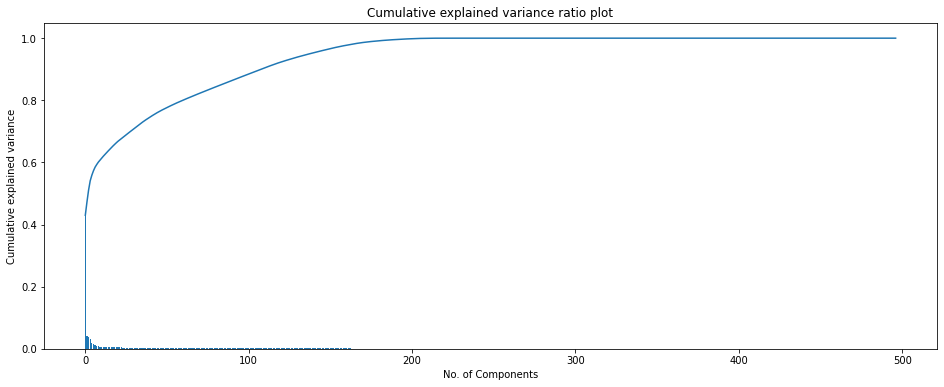

In [133]:
from sklearn.decomposition import PCA

# initialize the pca object
pca = PCA()
# fit pca object on the population data
pca.fit(azdias_scaled_df)
# display the PCA scree plot
pca_scree_plot(pca)

In [73]:
pca_azdias = PCA(n_components=150)
azdias_reduced_df = pd.DataFrame(pca.fit_transform(azdias_scaled_df))

In [74]:
customers_reduced_df = pd.DataFrame(pca.transform(customers_scaled_df))

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [75]:
from sklearn.cluster import KMeans

sum_sq_error = []
k_ls = list(range(1, 21, 1))
print(k_ls)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [76]:
azdias_reduced_df.shape

(891221, 497)

In [77]:
azdias_sample = azdias_reduced_df.sample(20000, random_state=0)

for k in k_ls:
    print(k)
    km = KMeans(n_clusters=k)
    km.fit(azdias_sample)
    sum_sq_error.append(km.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


([<matplotlib.axis.XTick at 0x7f8a08245fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

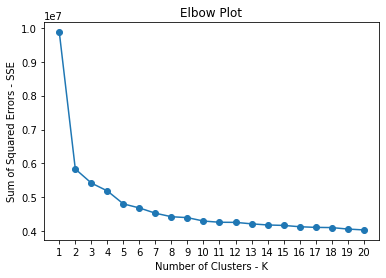

In [78]:
plt.plot(k_ls, sum_sq_error, '-o')
plt.xlabel("Number of Clusters - K")
plt.ylabel("Sum of Squared Errors - SSE")
plt.title("Elbow Plot")
plt.xticks(list(range(1,21)))

The elbow of the above plot is at K=2, which means this is the point from where the KMeans clustering is optimal. However this is too few clusters. So I have used K=5 for better segmentation

In [79]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(azdias_reduced_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
azdias_clusters = pd.DataFrame(kmeans_model.predict(azdias_reduced_df), columns=['Cluster'])

In [81]:
customers_clusters = pd.DataFrame(kmeans_model.predict(customers_reduced_df), columns=['Cluster'])

In [82]:
azdias_clusters = azdias_clusters['Cluster'].value_counts().sort_index()
azdias_clusters

0    576082
1     33835
2    105630
3    170820
4      4854
Name: Cluster, dtype: int64

In [83]:
customers_clusters = customers_clusters['Cluster'].value_counts().sort_index()
customers_clusters

0    144882
3     46770
Name: Cluster, dtype: int64

In [84]:
cluster_info = pd.concat([azdias_clusters, customers_clusters], axis=1)
cluster_info.columns = ["Population", "Customers"]
cluster_info

,Population,Customers
0,576082,144882.0
1,33835,NaN
2,105630,NaN
3,170820,46770.0
4,4854,NaN


In [85]:
for col in ["Population", "Customers"]:
    cluster_info[col] = cluster_info[col]/cluster_info[col].sum()
cluster_info

,Population,Customers
0,0.646396,0.755964
1,0.037965,NaN
2,0.118523,NaN
3,0.191670,0.244036
4,0.005446,NaN


<AxesSubplot:>

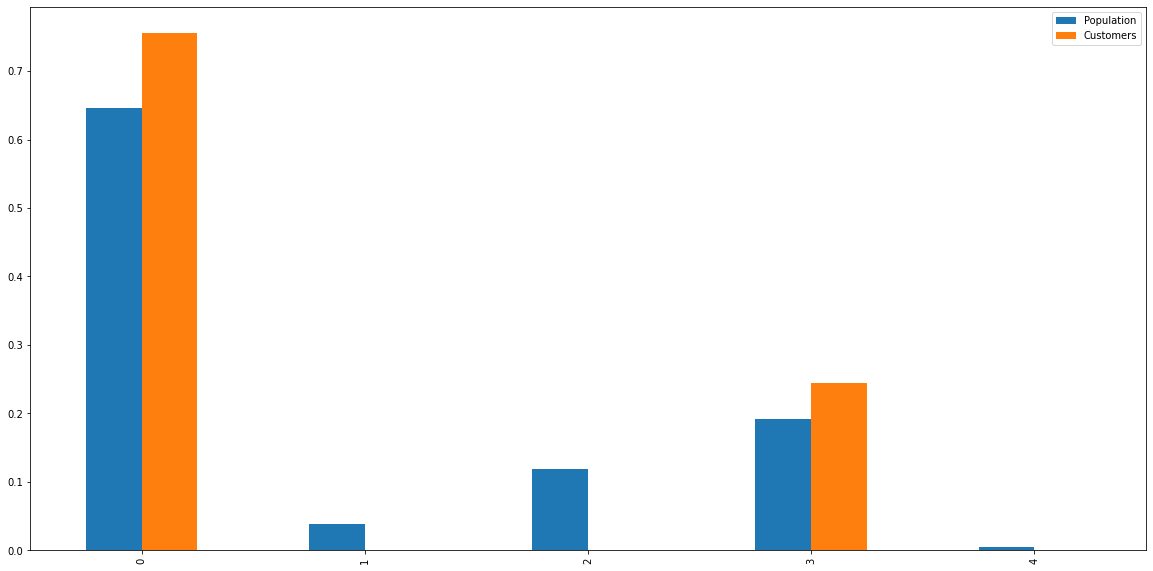

In [86]:
cluster_info.plot(kind='bar', figsize=(20, 10))

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [87]:
mailout_train = pd.read_csv('data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/Users/Archana/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [89]:
mailout_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42962 entries, 0 to 42961
Columns: 367 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(6)
memory usage: 120.3+ MB


In [90]:
set(mailout_train.columns)-set(azdias.columns)

{'RESPONSE'}

In [91]:
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

/Users/Archana/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RESPONSE', ylabel='count'>

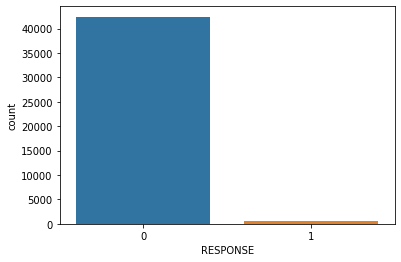

In [92]:
import seaborn as sns
sns.countplot(mailout_train['RESPONSE'])

In [93]:
target = mailout_train['RESPONSE']
mailout_train = mailout_train.drop('RESPONSE', axis=1)

In [94]:
set(mailout_train.columns)==set(azdias.columns)

True

In [95]:
mailout_train.dtypes.value_counts()

float64    267
int64       93
object       6
dtype: int64

In [96]:
cols_to_drop = ['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'KK_KUNDENTYP', 'EXTSEL992']

In [97]:
mailout_train = clean_data(mailout_train, cols_to_drop)
print(mailout_train.shape)
print(mailout_train.isnull().sum().sum())

(42962, 360)
0


In [98]:
mailout_train = add_temporal_features(mailout_train, 'EINGEFUEGT_AM')
mailout_train.shape

(42962, 362)

In [99]:
mailout_train['OST_WEST_KZ'] = mailout_train['OST_WEST_KZ'].map({'W': 1, 'O': 1})

In [100]:
cat_cols = mailout_train.select_dtypes(include='object').columns.values
print(cat_cols)

['CAMEO_DEU_2015' 'CAMEO_DEUG_2015' 'CAMEO_INTL_2015'
 'D19_LETZTER_KAUF_BRANCHE']


In [101]:
mailout_train = mailout_train.drop(cat_cols, axis=1)
mailout_train.dtypes.value_counts()

float64    261
int64       97
dtype: int64

In [102]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
mailout_train_scaled = pd.DataFrame(sc.fit_transform(mailout_train), columns=mailout_train.columns)

In [103]:
from sklearn.model_selection import train_test_split

X = mailout_train_scaled
y = target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(30073, 358)

In [104]:
X_val.shape

(12889, 358)

## Train Model and Benchmark Performance

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

/Users/Archana/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Baseline logistic regression model

In [106]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
y_pred = lr.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.0
ROC AUC Score: 0.5


/Users/Archana/opt/anaconda3/envs/test_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random forest

In [108]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
y_pred = rf.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.0
ROC AUC Score: 0.49960716530483973


### Decision tree

In [110]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
y_pred = dtree.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.044226044226044224
ROC AUC Score: 0.5186401282837076


### Gradient Boosting Classifier

In [112]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [113]:
y_pred = gbc.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.0
ROC AUC Score: 0.49980358265241986


### Fixing skewed data

In [115]:
y.value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [116]:
train_df = X_train.copy()
train_df['RESPONSE'] = y_train
train_df.shape

(30073, 359)

In [117]:
train_df_1 = train_df[train_df['RESPONSE']==1]
print(train_df_1.shape)
train_df_0 = train_df[train_df['RESPONSE']==0]
print(train_df_0.shape)

(371, 359)
(29702, 359)


In [118]:
from sklearn.utils import resample, shuffle

train_df_1_upsampled = resample(train_df_1, random_state=0, n_samples=29702, replace=True)
print(train_df_1_upsampled.shape)

(29702, 359)


In [ ]:
train_df_1_upsampled.head()

In [119]:
train_df_upsampled = pd.concat([train_df_0, train_df_1_upsampled])
print(train_df_upsampled.shape)

(59404, 359)


In [120]:
train_df_upsampled['RESPONSE'].value_counts()

1    29702
0    29702
Name: RESPONSE, dtype: int64

In [121]:
y_train_upsampled = train_df_upsampled['RESPONSE']
X_train_upsampled = train_df_upsampled.drop('RESPONSE', axis=1)
print(X_train_upsampled.shape)

(59404, 358)


### Logistic Regression (balanced data)

In [122]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
y_pred = lr.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.03762662807525326
ROC AUC Score: 0.602493987921187


### Random Forest (balanced data)

In [124]:
rf = RandomForestClassifier()
rf.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
y_pred = rf.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.0
ROC AUC Score: 0.4991357636706474


### Decision Tree (balanced data)

In [126]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_upsampled, y_train_upsampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
y_pred = dtree.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.024242424242424242
ROC AUC Score: 0.5059405877783026


### Gradient Boosting Classifier (balanced data)

In [128]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_upsampled, y_train_upsampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [130]:
y_pred = gbc.predict(X_val)
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_pred)}")

F1 Score: 0.06714801444043321
ROC AUC Score: 0.6899826664740719


### Comparison of results b/w baseline and final model

The baseline for this project as mentioned in the proposal was a Logistic Regression model. While Random Forest and Decision Tree has been used to have more data to compare, it is the Gradient Boost classifier that has performed well in both skewed and balanced data cases.

| Model               | F1 score | ROC AUC |
|---------------------|----------|---------|
| Logistic Regression | 0.0      | 0.5     |
| Gradient Boosting   | 0.0      | 0.49980 |  

Table 1.1 Model performance on skewed data

| Model               | F1 score | ROC AUC |
|---------------------|----------|---------|
| Logistic Regression | 0.03763  | 0.60249 |
| Gradient Boosting   | 0.06715  | 0.68998 |  

Table 1.2 Model performance on balanced data

From the tables above it can be seen that there is very little improvement to the F1 score but the Area Under the Receiver Operating Characteristic Curve is much higher once the data was upsampled.